# CodeCraft Infotech Data Science Task 4:
Name: Armand Faris A Surbakti

In this 4th Data Science Project, I am given a task to analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

Let's start by importing the needed libraries

In [27]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import os
from google.colab import files


from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Let's load and setup our dataset to be used in this notebook.

In [2]:
#load the dataset, with proper column names
train_df = pd.read_csv('twitter_training.csv', header=None, names=['id', 'topic', 'sentiment', 'text'])
val_df = pd.read_csv('twitter_validation.csv', header=None, names=['id', 'topic', 'sentiment', 'text'])

train_df.head()

,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Check for Columns

In [3]:
#check and verify columns
print("Training Data Columns:", train_df.columns)
print("Validation Data Columns:", val_df.columns)

Training Data Columns: Index(['id', 'topic', 'sentiment', 'text'], dtype='object')
Validation Data Columns: Index(['id', 'topic', 'sentiment', 'text'], dtype='object')


Check for non-string values

In [4]:
print("Data Types in Training Data:")
print(train_df.dtypes)

print("Sample Non-String Values in 'text':")
print(train_df[~train_df['text'].apply(lambda x: isinstance(x, str))])

Data Types in Training Data:
id            int64
topic        object
sentiment    object
text         object
dtype: object
Sample Non-String Values in 'text':
         id        topic sentiment text
61     2411  Borderlands   Neutral  NaN
553    2496  Borderlands   Neutral  NaN
589    2503  Borderlands   Neutral  NaN
745    2532  Borderlands  Positive  NaN
1105   2595  Borderlands  Positive  NaN
...     ...          ...       ...  ...
73972  9073       Nvidia  Positive  NaN
73973  9073       Nvidia  Positive  NaN
74421  9154       Nvidia  Positive  NaN
74422  9154       Nvidia  Positive  NaN
74423  9154       Nvidia  Positive  NaN

[686 rows x 4 columns]


Ensure all values in text are strings

In [5]:
train_df['text'] = train_df['text'].astype(str)
val_df['text'] = val_df['text'].astype(str)

Let's check for missing and duplicate columns first.

In [6]:
#check for missing values
train_df.isna().sum()

,0
id,0
topic,0
sentiment,0
text,0


In [7]:
val_df.isna().sum()

,0
id,0
topic,0
sentiment,0
text,0


In [8]:
#drop null values
train_df.dropna(inplace=True)

In [9]:
#check again for missing values
train_df.isna().sum()

,0
id,0
topic,0
sentiment,0
text,0


Now, it's time to pre-process both datasets. Here we perform text pre-processing with libraries such as NLTK.

In [10]:
#define some functions for cleaning text
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

#apply the cleaning text function to both datasets
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
val_df['cleaned_text'] = val_df['text'].apply(clean_text)


#after that, remove stopwords
train_df['cleaned_text'] = train_df['cleaned_text'].apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words]))
val_df['cleaned_text'] = val_df['cleaned_text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

#display the cleaned text
print("Cleaned Training Data:")
print(train_df.head())

print("----------------")

print("Cleaned Validation Data:")
print(val_df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Cleaned Training Data:
     id        topic sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                      cleaned_text  
0    im getting borderlands murder  
1              coming borders kill  
2      im getting borderlands kill  
3     im coming borderlands murder  
4  im getting borderlands 2 murder  
----------------
Cleaned Validation Data:
     id      topic   sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4

Let's Perform EDA (Exploratory Data Analysis). Here I'll just do some visualizations of training labels, data labels, and then use wordcloud to plot common words.

<ipython-input-11-d54dea8283da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_label_counts.index, y=train_label_counts.values, palette="Set2")


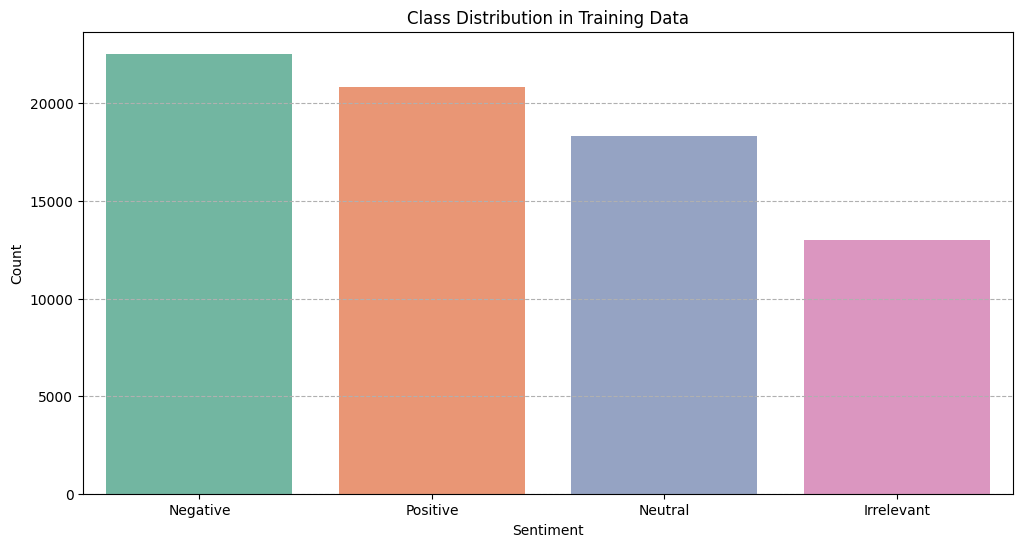

In [11]:
#training label data distribution
plt.figure(figsize=(12, 6))
train_label_counts = train_df['sentiment'].value_counts()
sns.barplot(x=train_label_counts.index, y=train_label_counts.values, palette="Set2")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Class Distribution in Training Data')
plt.grid(axis='y', linestyle='--')
plt.show()

<ipython-input-12-10ca1b6f43d5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_label_counts.index, y=val_label_counts.values,palette="Set2")


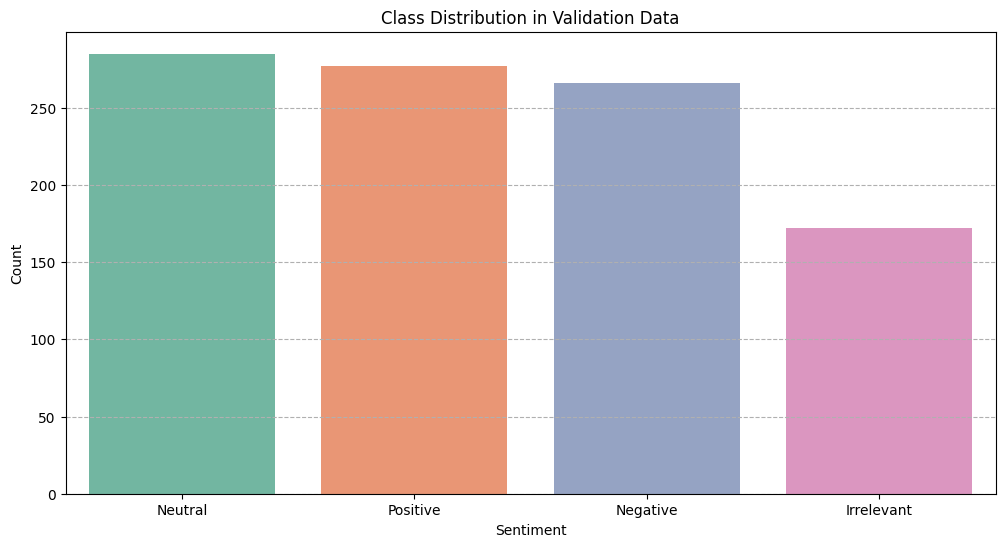

In [12]:
#validation data label distribution
plt.figure(figsize=(12, 6))
val_label_counts = val_df['sentiment'].value_counts()
sns.barplot(x=val_label_counts.index, y=val_label_counts.values,palette="Set2")
plt.title('Class Distribution in Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')
plt.show()

We can visualize common words using WordCloud

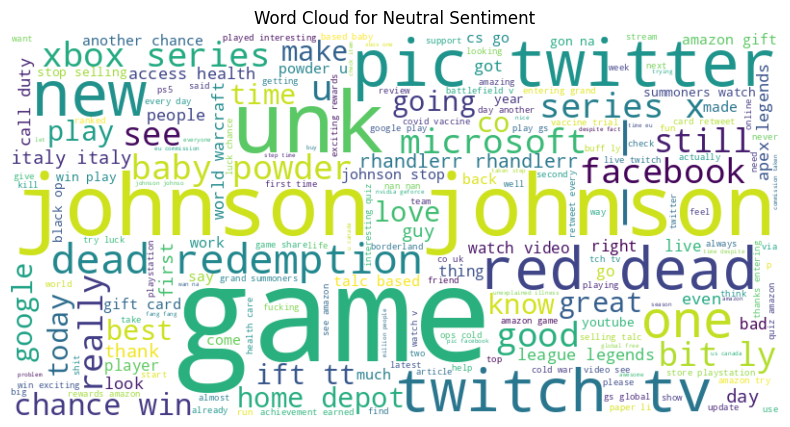

In [21]:
#create a plot wordcloud function
def plot_wordcloud(data, sentiment):
    text = ' '.join(data[data['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

plot_wordcloud(train_df, 'Neutral')

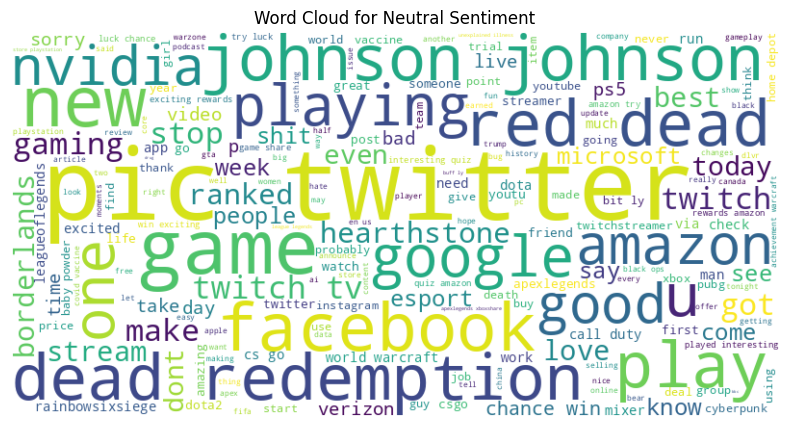

In [20]:
plot_wordcloud(val_df, 'Neutral')

Using a seaborn histogram, we can plot Text Length Distribution to understand variance in the dataset.

In [15]:
train_df['text_length'] = train_df['cleaned_text'].apply(len)
val_df['text_length'] = val_df['cleaned_text'].apply(len)

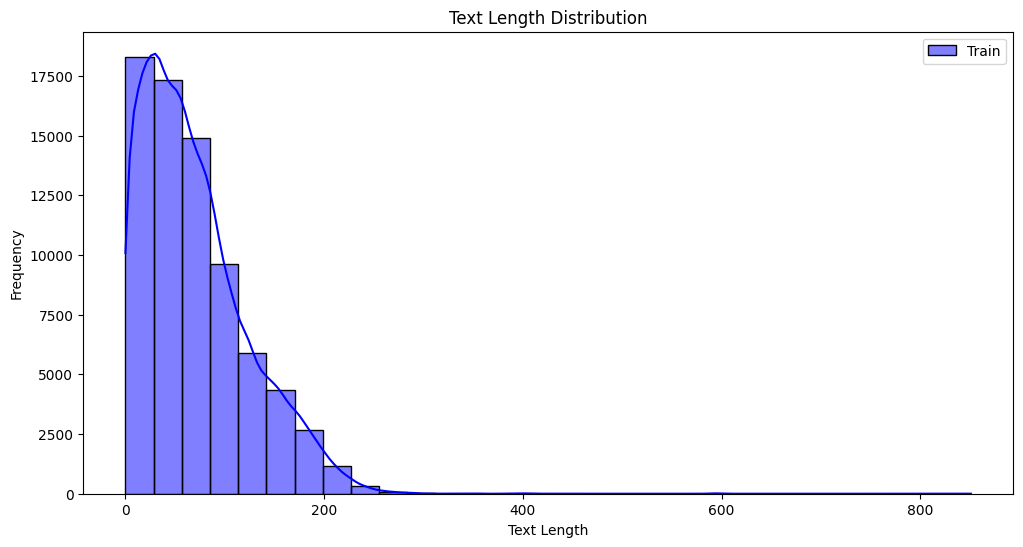

In [22]:
#find out the distribution of length of words in the training dataset
plt.figure(figsize=(12, 6))
sns.histplot(train_df['text_length'], kde=True, bins=30, color='blue', label='Train')
plt.legend()
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

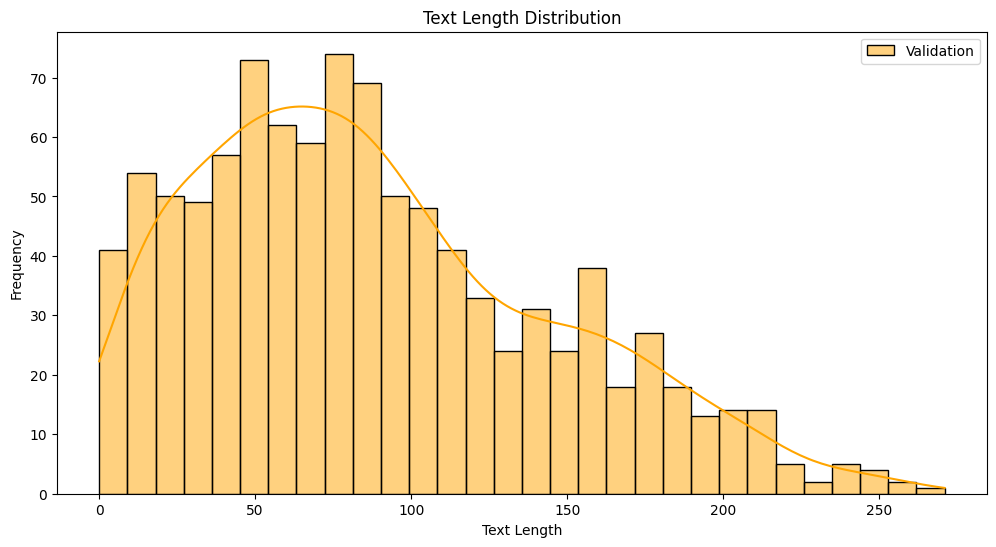

In [23]:
#find out the distribution of length of words in the validation dataset
plt.figure(figsize=(12, 6))
sns.histplot(val_df['text_length'], kde=True, bins=30, color='orange', label='Validation')
plt.legend()
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

After this, we can check correlation between Text Length and Sentiment using this violinplot

<ipython-input-24-f90e5c3ce079>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sentiment', y='text_length', data=train_df, palette='muted')


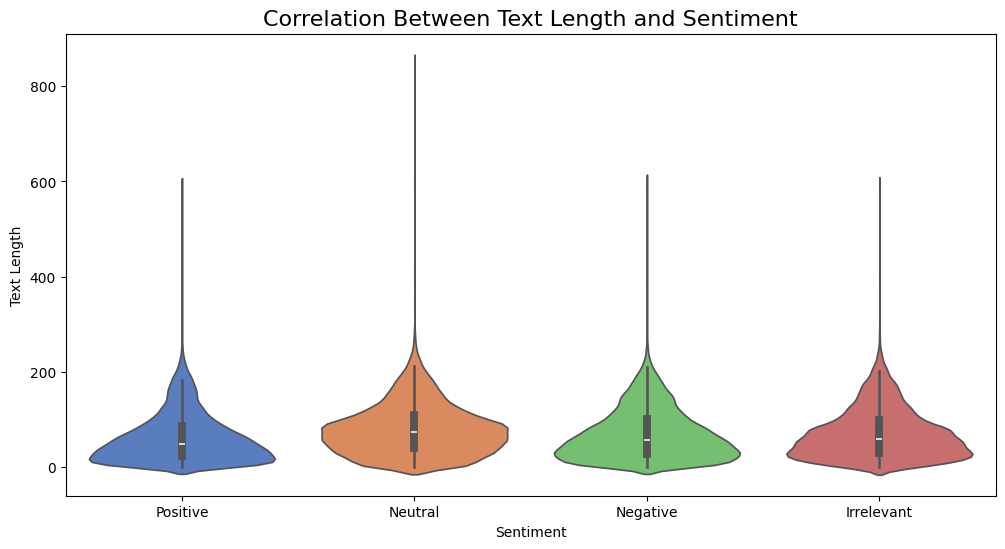

In [24]:
#check if longer texts correlate with certain sentiments

plt.figure(figsize=(12,6))
sns.violinplot(x='sentiment', y='text_length', data=train_df, palette='muted')
plt.title('Correlation Between Text Length and Sentiment', fontsize=16)
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

Finally, I'll do bigram and trigram analysis, which are stuff like single word, two consecutive words, three consecutive words, etc. This can help identify common word pairs or triplets in text data.

<ipython-input-28-8739904ee510>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams, palette='coolwarm')


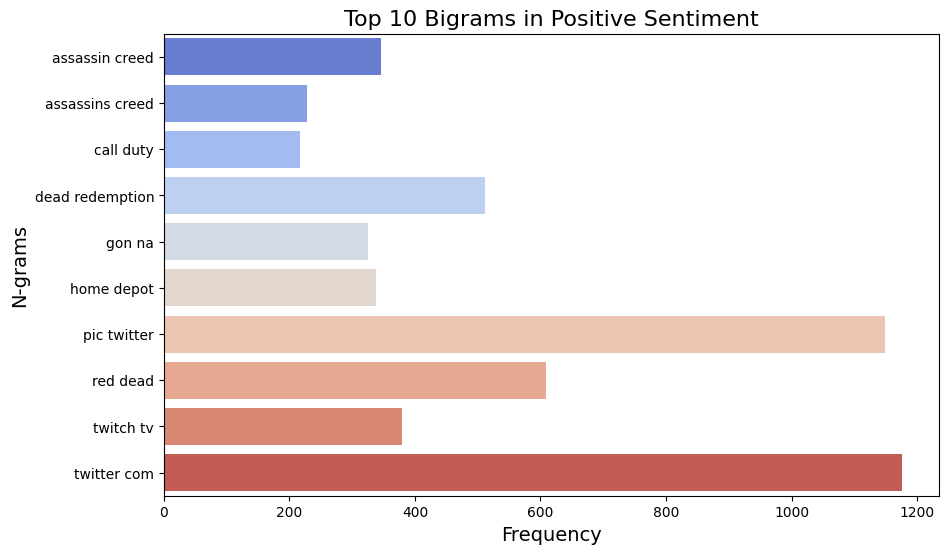

<ipython-input-28-8739904ee510>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams, palette='coolwarm')


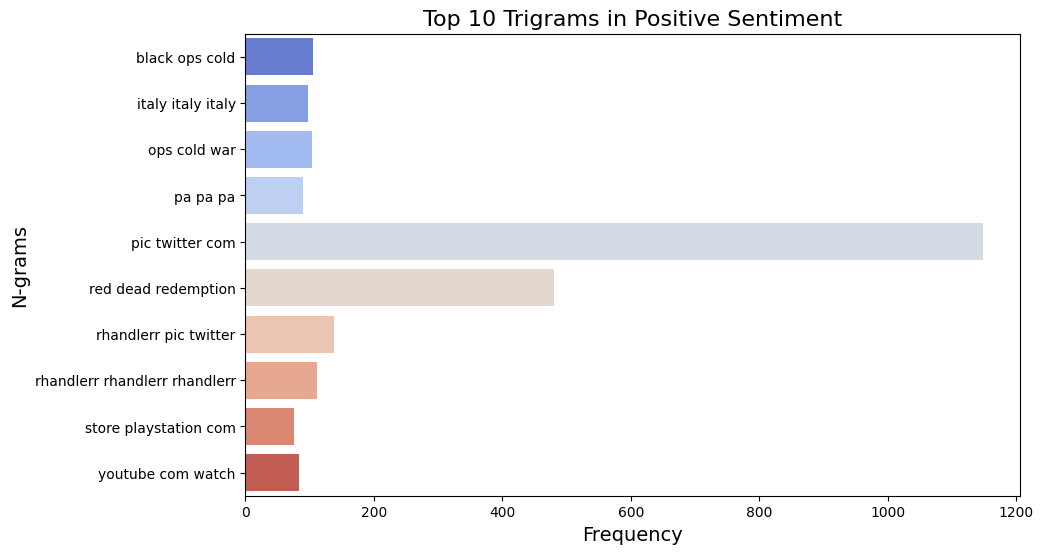

<ipython-input-28-8739904ee510>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams, palette='coolwarm')


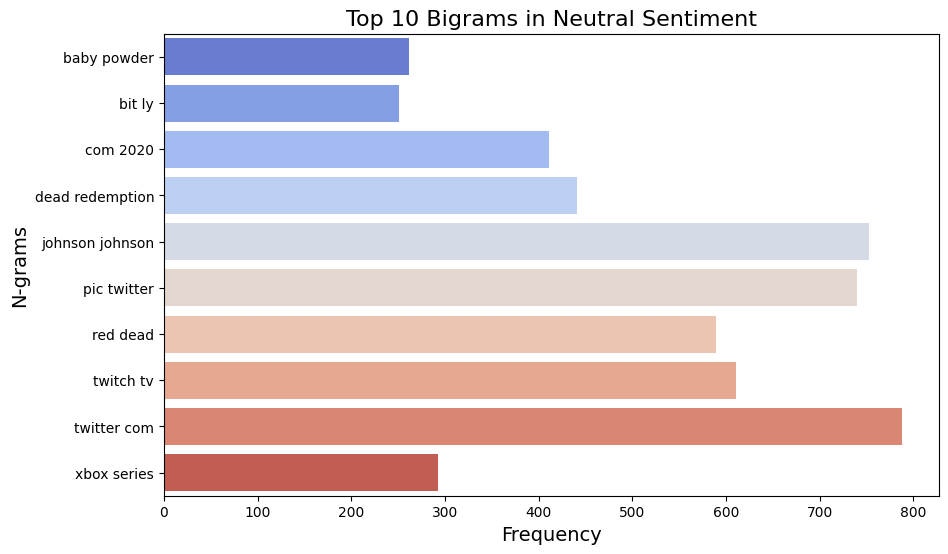

<ipython-input-28-8739904ee510>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams, palette='coolwarm')


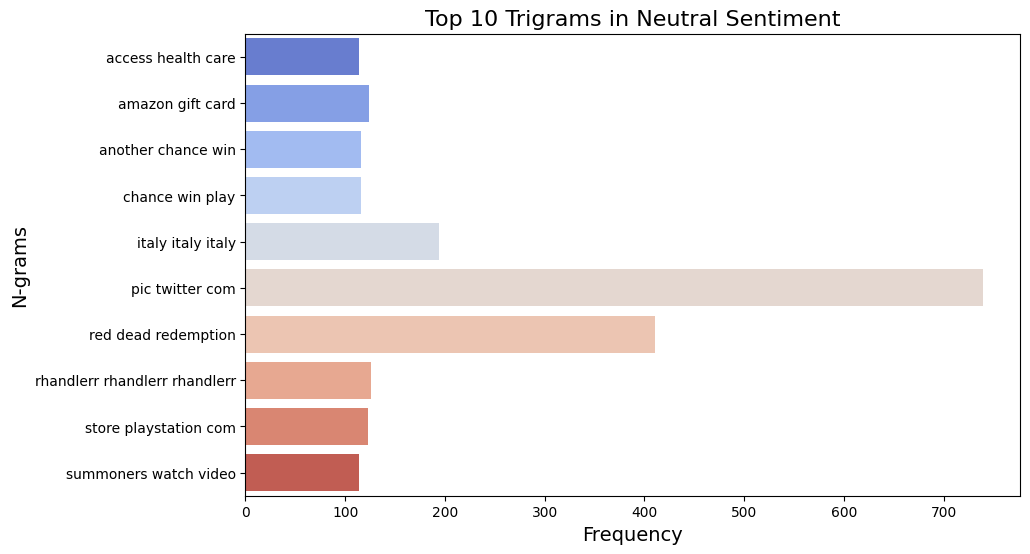

<ipython-input-28-8739904ee510>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams, palette='coolwarm')


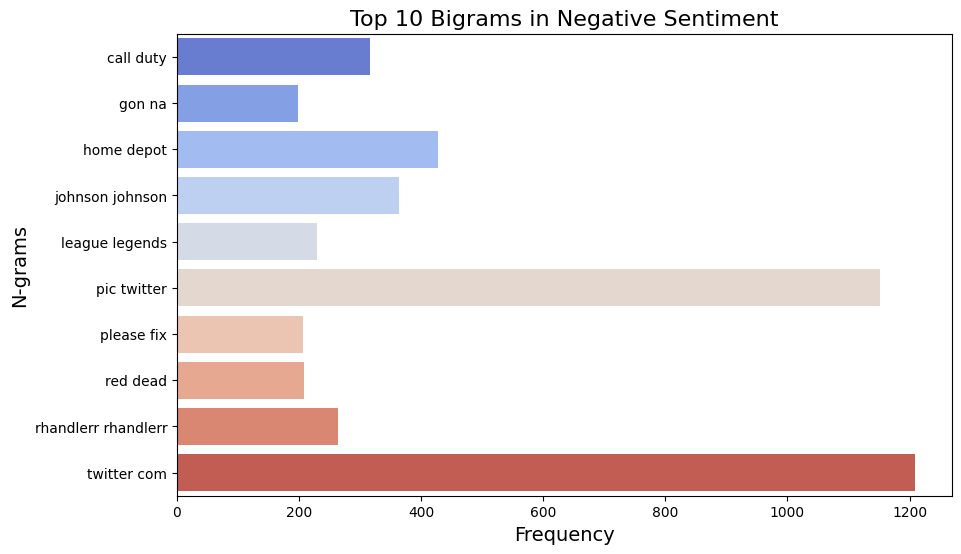

<ipython-input-28-8739904ee510>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams, palette='coolwarm')


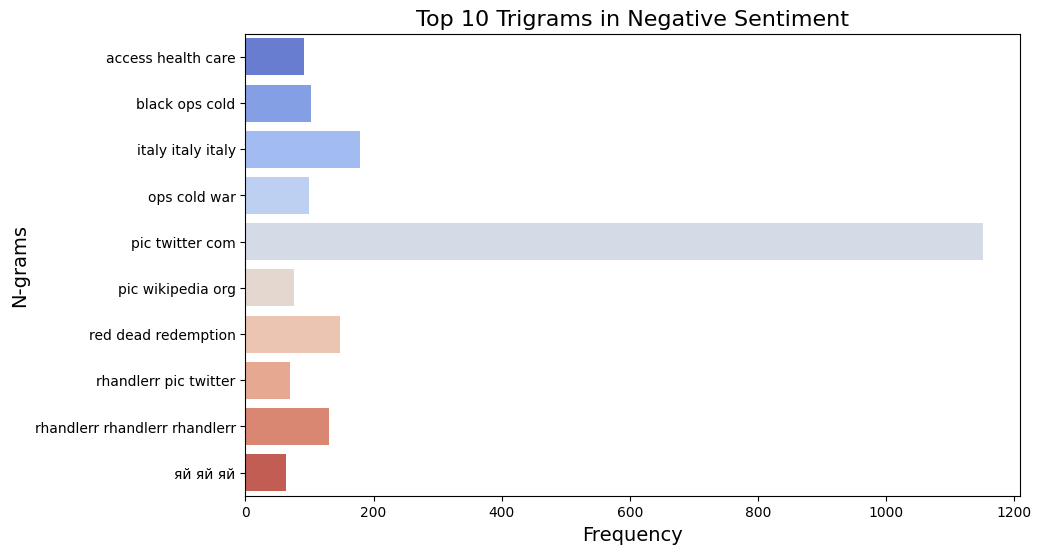

<ipython-input-28-8739904ee510>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams, palette='coolwarm')


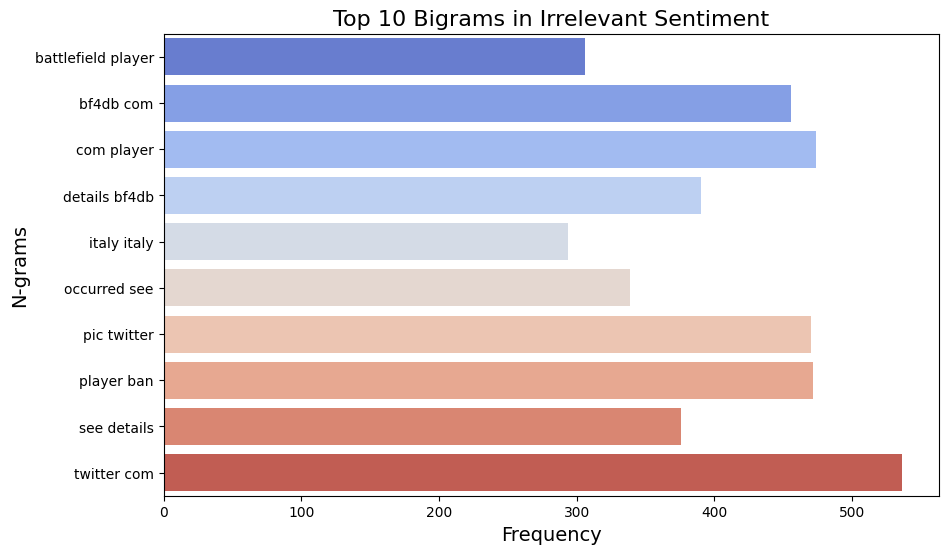

<ipython-input-28-8739904ee510>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams, palette='coolwarm')


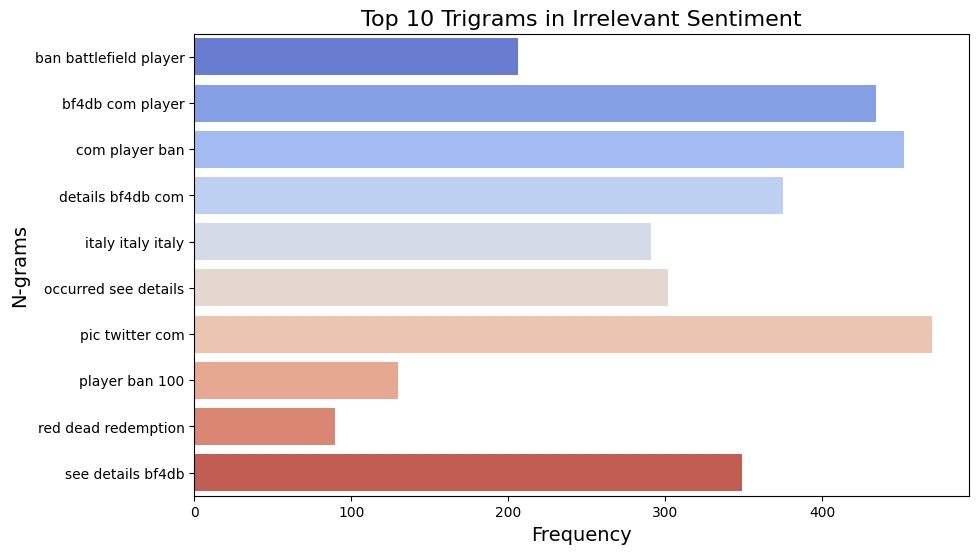

In [28]:
#create ngram functions

def plot_ngrams(df, sentiment, n=10, ngram_range=(2,2)):
  sentiment_text = df[df['sentiment'] == sentiment]['cleaned_text']
  vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=n)
  X = vectorizer.fit_transform(sentiment_text)
  ngrams = vectorizer.get_feature_names_out()
  counts = X.toarray().sum(axis=0)

  plt.figure(figsize=(10, 6))
  sns.barplot(x=counts, y=ngrams, palette='coolwarm')
  plt.title(f"Top {n} {'Bigrams' if ngram_range==(2,2) else 'Trigrams'} in {sentiment} Sentiment", fontsize=16)
  plt.xlabel('Frequency', fontsize=14)
  plt.ylabel('N-grams', fontsize=14)
  plt.show()


#plot ngrams for bigrams and trigrams
for sentiment in train_df['sentiment'].unique():
    plot_ngrams(train_df, sentiment, n=10, ngram_range=(2, 2))
    plot_ngrams(train_df, sentiment, n=10, ngram_range=(3, 3))
